In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np

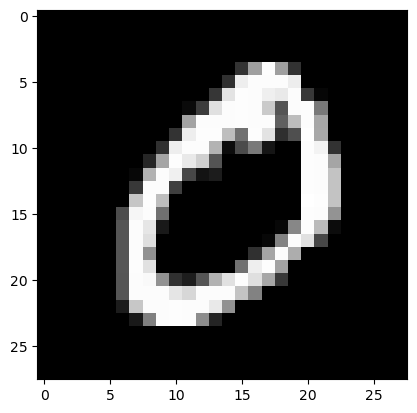

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
plt.imshow(x_train[1], cmap="gray")

In [3]:
x_train[0].shape

(28, 28)

In [4]:
28*28

784

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
x_train = x_train/255.0
x_test = x_test/255.0

In [7]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation='relu')(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')


decoder_input = keras.layers.Dense(784, activation='relu')(encoder_output)
decoder_output = keras.layers.Reshape((28, 28, 1))(decoder_input)

opt = keras.optimizers.Adam(learning_rate=0.001)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [9]:
autoencoder.compile(opt, loss='mse')

In [10]:
autoencoder.fit(x_train, x_train, epochs=3, batch_size=32, validation_split=0.1)

Epoch 1/3
   1/1688 [..............................] - ETA: 5:00 - loss: 0.1061

2023-01-26 13:10:08.633021: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1688/1688 [==============================] - 2s 1ms/step - loss: 0.0187 - val_loss: 0.0131
Epoch 2/3
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0125 - val_loss: 0.0123
Epoch 3/3
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0121 - val_loss: 0.0120


In [11]:
example = encoder.predict([x_test[0].reshape(-1, 28, 28, 1)])[0]

1/1 [==============================] - 0s 32ms/step


In [12]:
print(example)

[1.3266301  1.4430914  2.1629517  0.82702434 1.709822   0.53769964
 0.380889   0.7605804  1.7777971  0.920829   1.2162755  0.9646354
 0.6685337  0.800025   0.         0.97995573 1.7640799  0.3491903
 1.2071886  0.6661134  1.2561587  0.47159523 0.28597856 1.9936166
 0.9789337  0.8208933  0.677533   0.7028351  0.75634944 1.3535296
 0.64350426 0.         0.74239147 4.064965   0.916899   1.8294892
 0.3626907  0.3145802  0.7581004  0.864115   1.5285871  0.2909355
 0.82219553 1.7492518  0.5112676  0.89735943 0.8539939  0.7031939
 1.3979511  1.594613   0.630381   0.08231264 0.         1.2611921
 1.2509693  1.2595532  1.0561012  2.0185382  1.9673022  0.8608574
 1.6170688  0.276435   0.24009916 1.6846479 ]


In [13]:
example.shape

(64,)

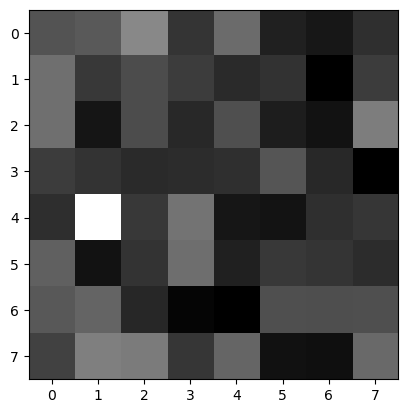

In [14]:
plt.imshow(example.reshape((8,8)), cmap='gray')

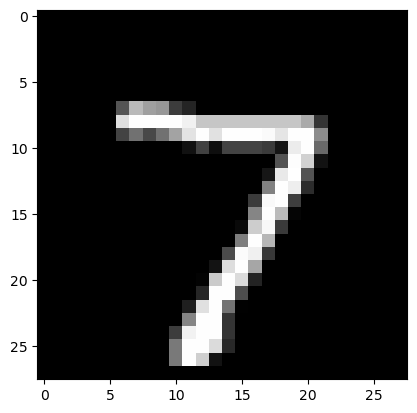

In [15]:
plt.imshow(x_test[0], cmap='gray')

In [16]:
ae_out = autoencoder.predict([x_test[0].reshape(-1, 28, 28, 1)])[0]

1/1 [==============================] - 0s 27ms/step


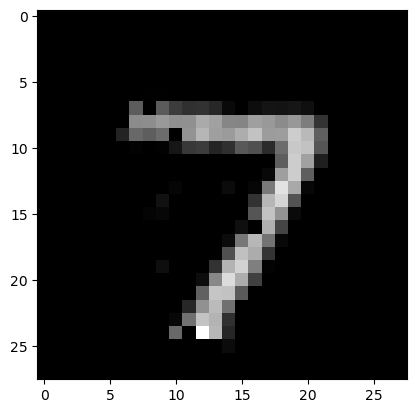

In [17]:
plt.imshow(ae_out, cmap='gray')